## IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
from collections import Counter
from bs4 import BeautifulSoup
import requests
!pip3 install beautifulsoup4
!pip3 install requests
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS


## WEB SCRAPING

In [2]:
url = 'https://www.wired.com/story/leaky-forms-keyloggers-meta-tiktok-pixel-study/#intcid=_wired-right-rail_c0fc1189-7452-46b2-a3e8-fe079deffdff_popular4-1-reranked-by-vidi'
req = requests.get(url)
#print(req.content)
html_content = req.content
soup = BeautifulSoup(html_content, 'html.parser')
#pprint(soup.prettify())


##### RECURSIVE FUNCTION TO GET THE LINKS AND THE SENTENCES

In [13]:
def get_sentences(url, corpus, sentences, links):
    req = requests.get(url)
    html_content = req.content
    soup = BeautifulSoup(html_content, 'html.parser')
    links_corpus = soup.find_all('a')
    for i in links_corpus:
        link = i.get('href')
        if(link is not None):
            if(link.startswith('https://www.wired.com/story/')):
                #print(link)
                links.append(link)
                req = requests.get(link)
                html_content = req.content
                soup = BeautifulSoup(html_content, 'html.parser')
                content_corpus = soup.find_all('p')
                # print(news_corpus[0].text)
                for j in content_corpus:   
                    corpus = corpus+j.text
                    corpus.replace("?",".") ## for better tokenization
                    corpus.replace("!",".") ## for better tokenization
                    sentences = corpus.split(".")
                    #print(sentences)
                    #print("Sentences length : ", len(sentences))
                    #print("URLS length : ", len(links))
                    if(len(sentences)>10000):
                        return sentences
    #print("Calling the function again with the link : ", links[-1])
    sentences = get_sentences(links[-1], corpus, sentences, links)
    return sentences


##### TO CALL THE RECURSIVE FUNCTION

In [4]:
## THIS FUNCTION WILL TAKE APPROX 2-3 minutes to complete
corpus = ""
links = []
sentences = []
temp=[]
links.append(url)
sentences = get_sentences(url, corpus, sentences, links)

# print(len(sentences))



## CLEANING THE CORPUS

In [5]:
#for sentence in sentences:
    # = re.findall(r'\b[A-Z](?:[&.]?[A-Z])+\b', sentence)
    #print(sentence)


english_words = set(nltk.corpus.words.words())

for sentence in sentences:
    " ".join(w for w in nltk.wordpunct_tokenize(sentence) \
             if w.lower() in english_words or not w.isalpha())

for sentence in sentences:
    sentence.replace("(","")
    sentence.replace(")","")
    sentence.replace("\"","")
    #print(sentence)


## OPERATIONS ON THE COURPUS

##### TOKENIZATIONS OF SENTENCES ALREADY DONE ABOVE*

### WORD TOKENTIZATION AND ITS GRAPH

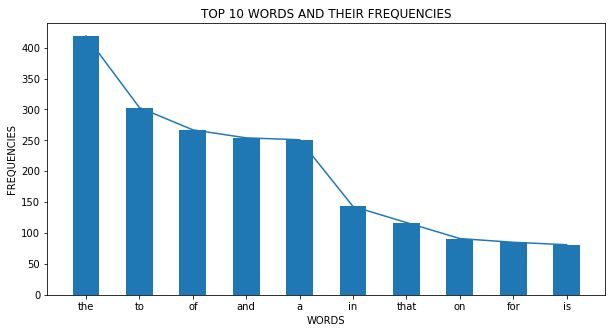

In [6]:
words =[]
for sentence in sentences:
    words.extend(sentence.split(" "))
    
words = [word for word in words if word]

# for word in words:
#     print(word)

word_count = Counter(words)
#print(word_count)

fig = plt.figure(figsize=(10,5))
plt.xlabel("WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 WORDS AND THEIR FREQUENCIES")
plt.bar([x for x,y in word_count.most_common(10)], [y for x,y in word_count.most_common(10)], width=0.5)
plt.plot([x for x,y in word_count.most_common(10)], [y for x,y in word_count.most_common(10)])
plt.show()

### POS TAGGING AND THE FREQUENCY GRAPH OF THE TAGS

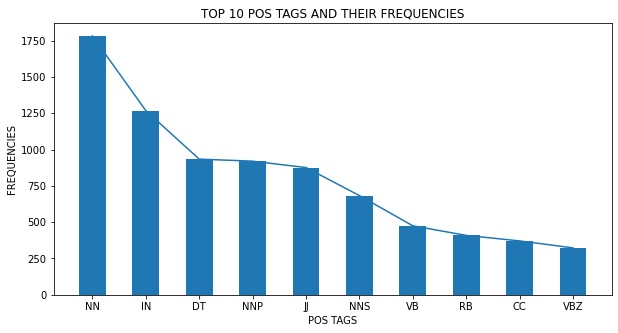

In [7]:
tagged_words = nltk.pos_tag(words)
#print(tagged_words)
tagged_words_counter = Counter([tagged_word[1] for tagged_word in tagged_words])
#print (tagged_words_counter)

fig = plt.figure(figsize=(10,5))
plt.xlabel("POS TAGS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 POS TAGS AND THEIR FREQUENCIES")
plt.bar([x for x,y in tagged_words_counter.most_common(10)], [y for x,y in tagged_words_counter.most_common(10)], width=0.5)
plt.plot([x for x,y in tagged_words_counter.most_common(10)], [y for x,y in tagged_words_counter.most_common(10)])
plt.show()

### REMOVING STOP WORDS AND THE FREQUNECY GRAPH AFTER REMOVING THE STOP WORDS

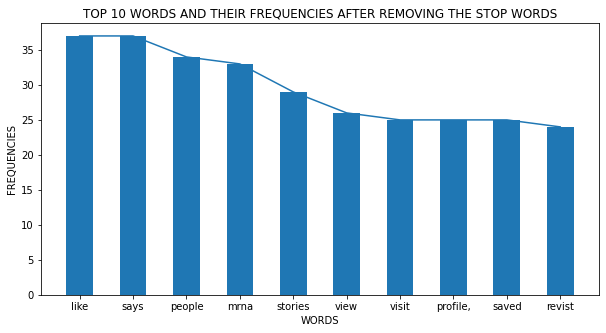

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
#print(stopwords)
removed_stop_words =[]
removed_stop_words = [word.lower() for word in words if word.lower() not in stopwords]
removed_stop_words_Counter = Counter(removed_stop_words)

#print(len(removed_stop_words))

fig = plt.figure(figsize=(10,5))
plt.xlabel("WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 WORDS AND THEIR FREQUENCIES AFTER REMOVING THE STOP WORDS")
plt.bar([x for x,y in removed_stop_words_Counter.most_common(10)], [y for x,y in removed_stop_words_Counter.most_common(10)], width=0.5)
plt.plot([x for x,y in removed_stop_words_Counter.most_common(10)], [y for x,y in removed_stop_words_Counter.most_common(10)])
plt.show()


### STEMMING OF WORDS AND GRAPH OF FREQUENCY OF THE STEMMED WORDS

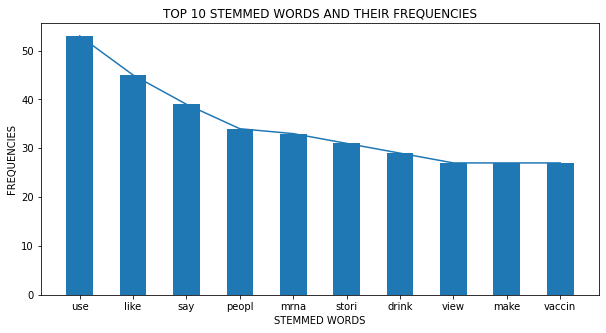

In [9]:
stemmer = PorterStemmer()
stemmed_words=[]
for word in removed_stop_words:
  stemmed_words.append(stemmer.stem(word))

stemmed_words_Counter = Counter(stemmed_words)
fig = plt.figure(figsize=(10,5))
plt.xlabel("STEMMED WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 STEMMED WORDS AND THEIR FREQUENCIES")
plt.bar([x for x,y in stemmed_words_Counter.most_common(10)], [y for x,y in stemmed_words_Counter.most_common(10)], width=0.5)
plt.plot([x for x,y in stemmed_words_Counter.most_common(10)], [y for x,y in stemmed_words_Counter.most_common(10)])
plt.show()

### LEMMATIZATION OF WORDS AND GRAPH OF FREQUENCY OF THE LEMMATIZED WORDS

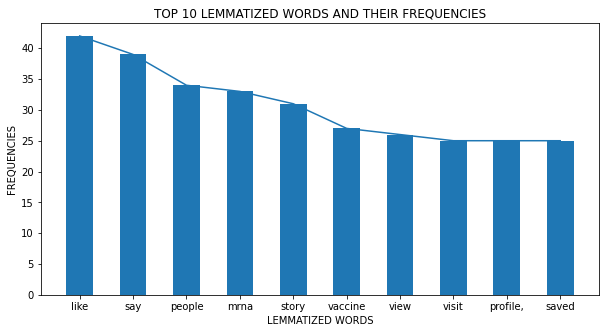

In [10]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for word in removed_stop_words:
    lemmatized_words.append(lemmatizer.lemmatize(word))
lemmatized_words_Counter = Counter(lemmatized_words)

stemmed_words_Counter = Counter(stemmed_words)
fig = plt.figure(figsize=(10,5))
plt.xlabel("LEMMATIZED WORDS")
plt.ylabel("FREQUENCIES")
plt.title("TOP 10 LEMMATIZED WORDS AND THEIR FREQUENCIES")
plt.bar([x for x,y in lemmatized_words_Counter.most_common(10)], [y for x,y in lemmatized_words_Counter.most_common(10)], width=0.5)
plt.plot([x for x,y in lemmatized_words_Counter.most_common(10)], [y for x,y in lemmatized_words_Counter.most_common(10)])
plt.show()

In [11]:
frequencies = []

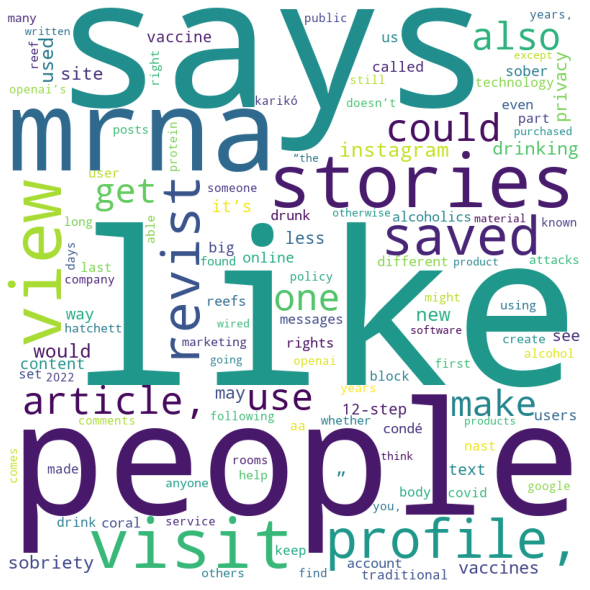

In [12]:


#word_cloud_string=' '.join(removed_stop_words)+' '
# removed_stop_words
# for word in removed_stop_words:
#     word_cloud_string+=" ".join

wordcloud = WordCloud(width = 800, height = 800,max_words=120,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(removed_stop_words_Counter)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

 ## 120 words in the word cloud as these were comprising of approximately 75% of the data(after removing the stop words)
plt.show()